In [2]:
library(ggplot2)
library(dplyr)
library(GGally)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.95 loaded



In [4]:
data("iris")
df <- iris

In [5]:
cat("Dataset Overview:\n")
print(head(df))

Dataset Overview:
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [6]:
cat("\nDataset Summary:\n")
print(summary(df))


Dataset Summary:
  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [7]:
cat("\nDataset Structure:\n")
 print(str(df))


Dataset Structure:
'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


In [9]:
cat("\nMissing Values Count:\n")
 missing_values <- colSums(is.na(df))
 print(missing_values)


Missing Values Count:
Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0 


In [10]:
install.packages("tidyverse")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
 df <- df %>%
 mutate(across(everything(), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))
 cat("\nMissing Values After Imputation:\n")
 print(colSums(is.na(df)))


Missing Values After Imputation:
Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0 


In [12]:
cat("\nNumber of duplicate rows:\n")
 sum(duplicated(df))


Number of duplicate rows:


[1] 1

Univariate Analysis


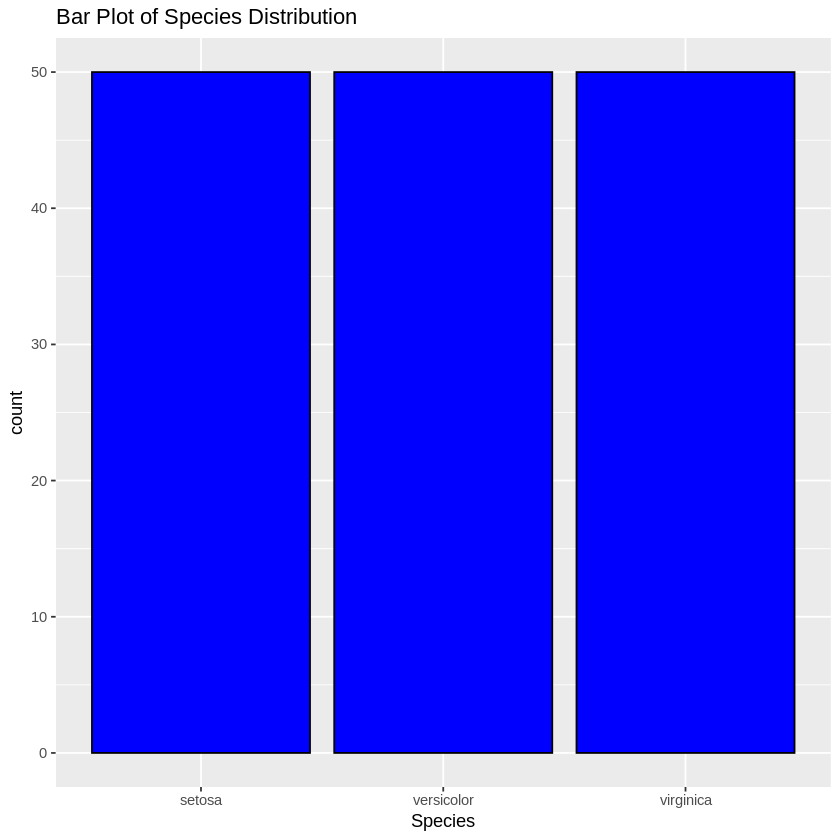

In [17]:
ggplot(iris, aes(x = Species)) +
  geom_bar(fill = "blue", color = "black") +
  ggtitle("Bar Plot of Species Distribution")

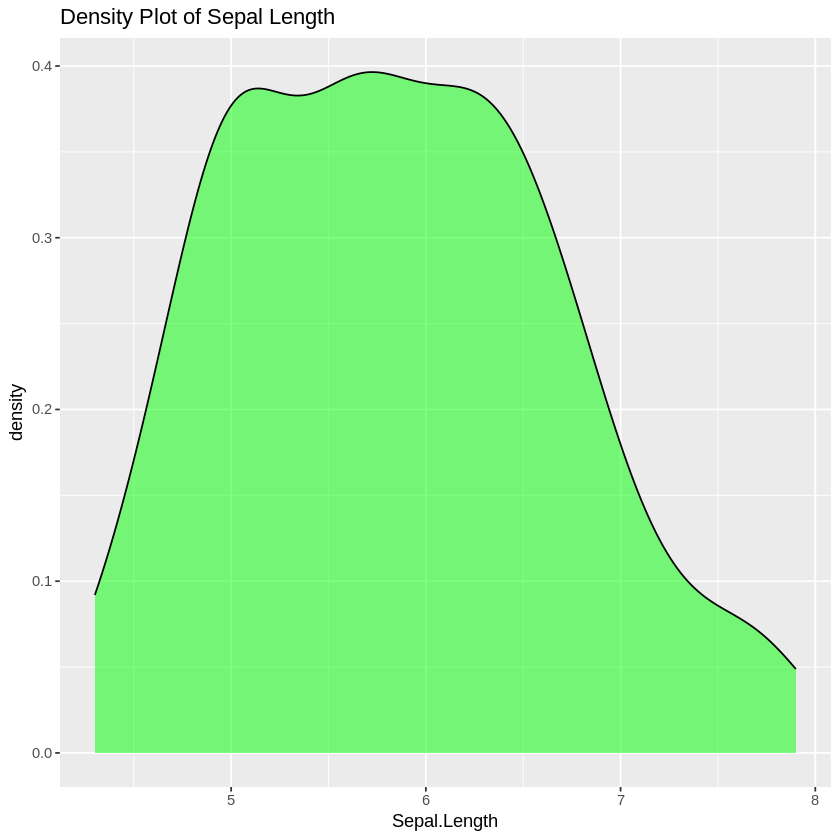

In [18]:
ggplot(iris, aes(x = Sepal.Length)) +
  geom_density(fill = "green", alpha = 0.5) +
  ggtitle("Density Plot of Sepal Length")

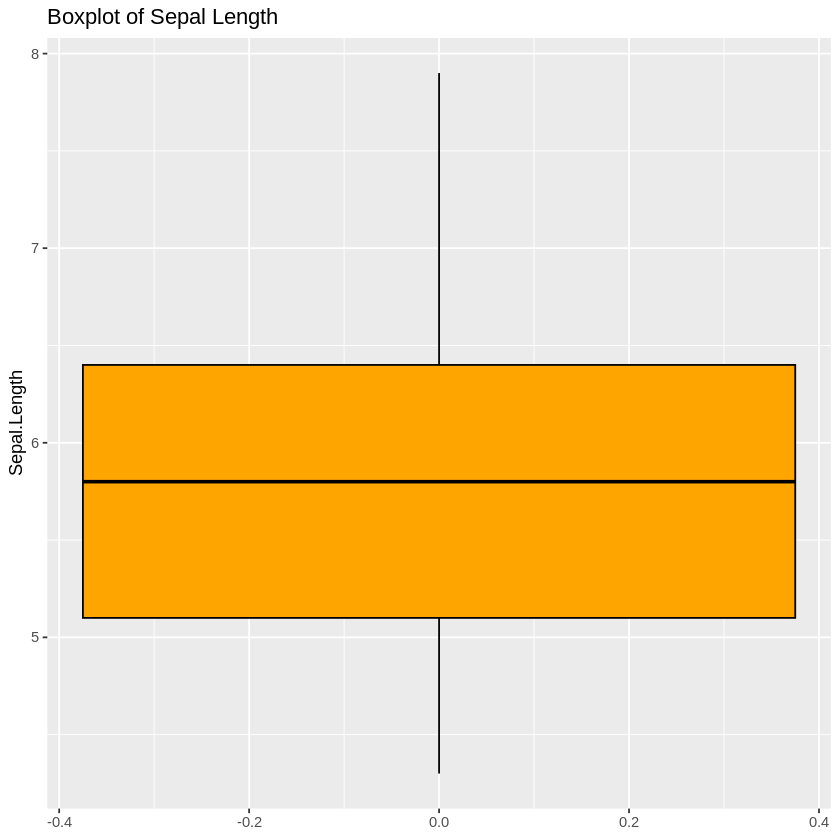

In [20]:
ggplot(iris, aes(y = Sepal.Length)) +
  geom_boxplot(fill = "orange", color = "black") +
  ggtitle("Boxplot of Sepal Length")

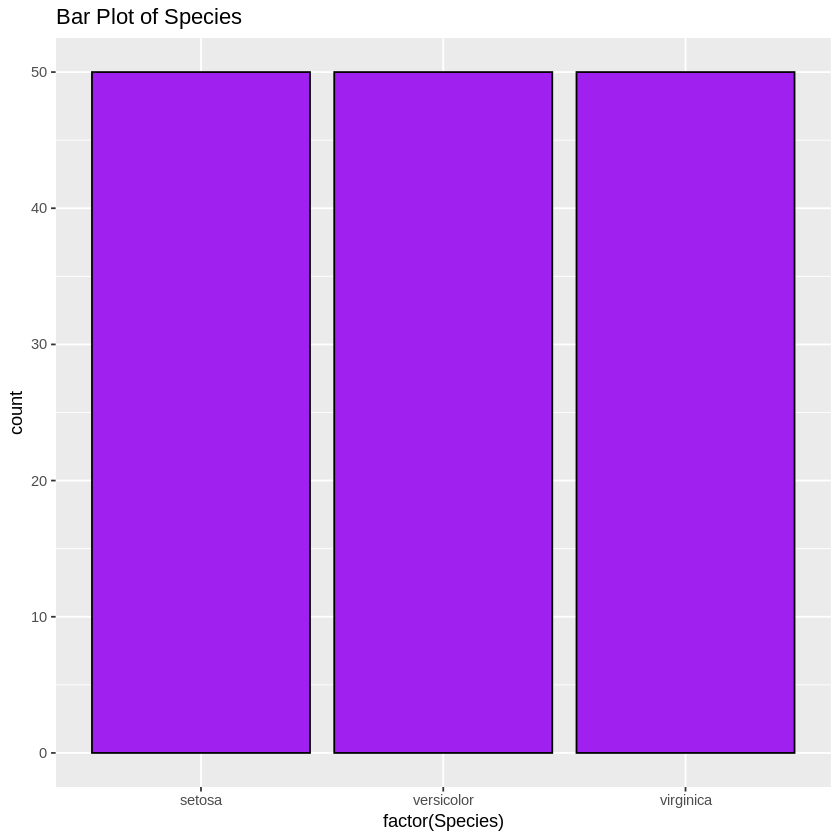

In [21]:
ggplot(iris, aes(x = factor(Species))) +
  geom_bar(fill = "purple", color = "black") +
  ggtitle("Bar Plot of Species")

Bivariate Analysis

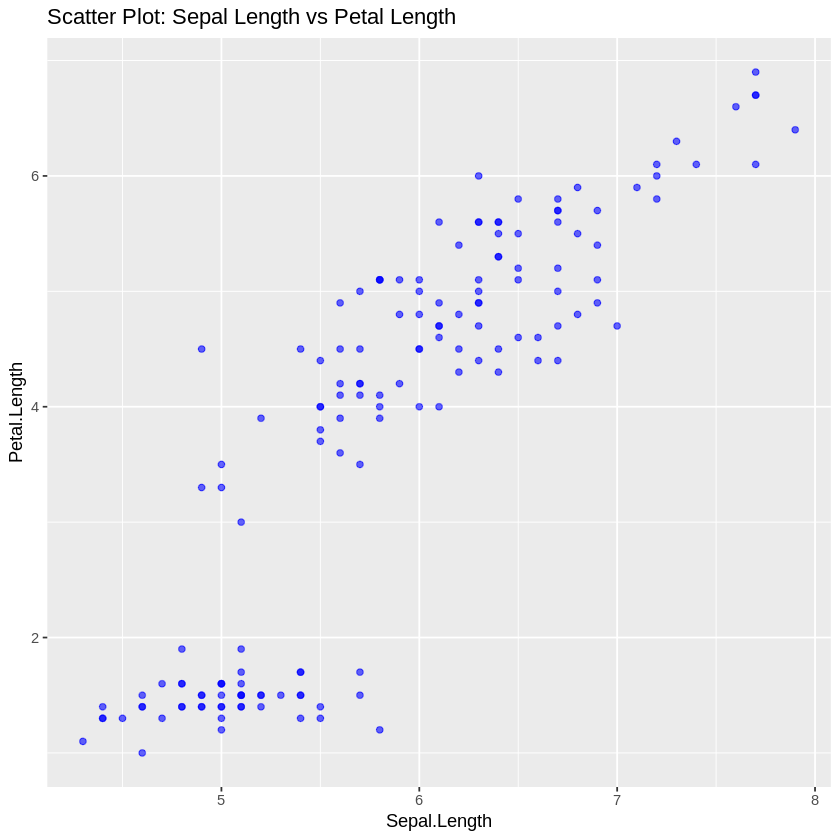

In [22]:

ggplot(iris, aes(x = Sepal.Length, y = Petal.Length)) +
  geom_point(color = "blue", alpha = 0.6) +
  ggtitle("Scatter Plot: Sepal Length vs Petal Length")


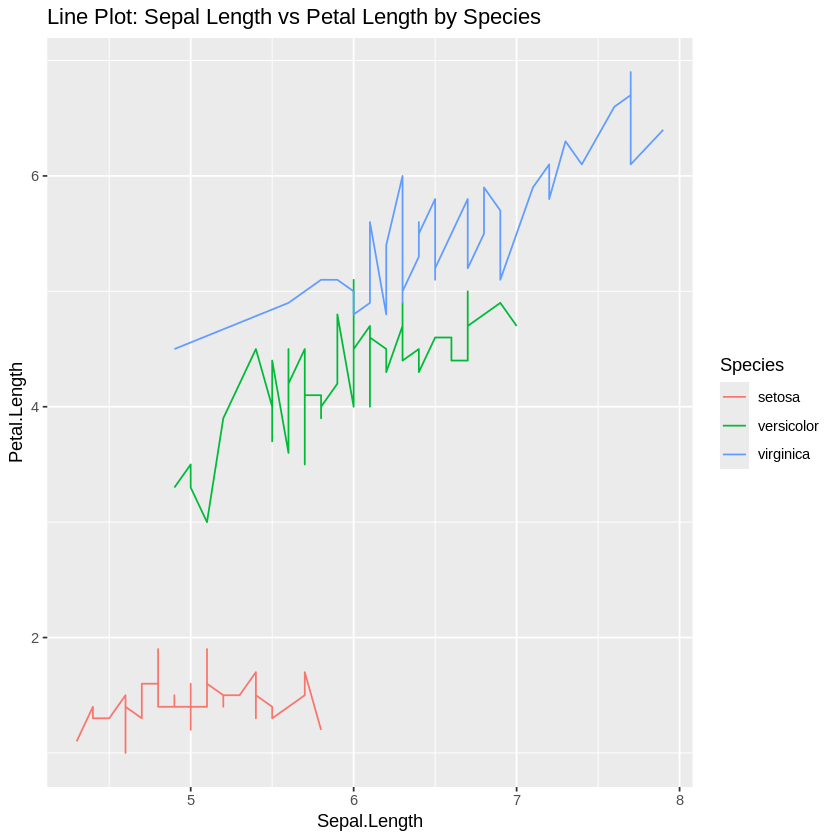

In [23]:
ggplot(iris, aes(x = Sepal.Length, y = Petal.Length, group = Species)) +
  geom_line(aes(color = Species)) +
  ggtitle("Line Plot: Sepal Length vs Petal Length by Species")

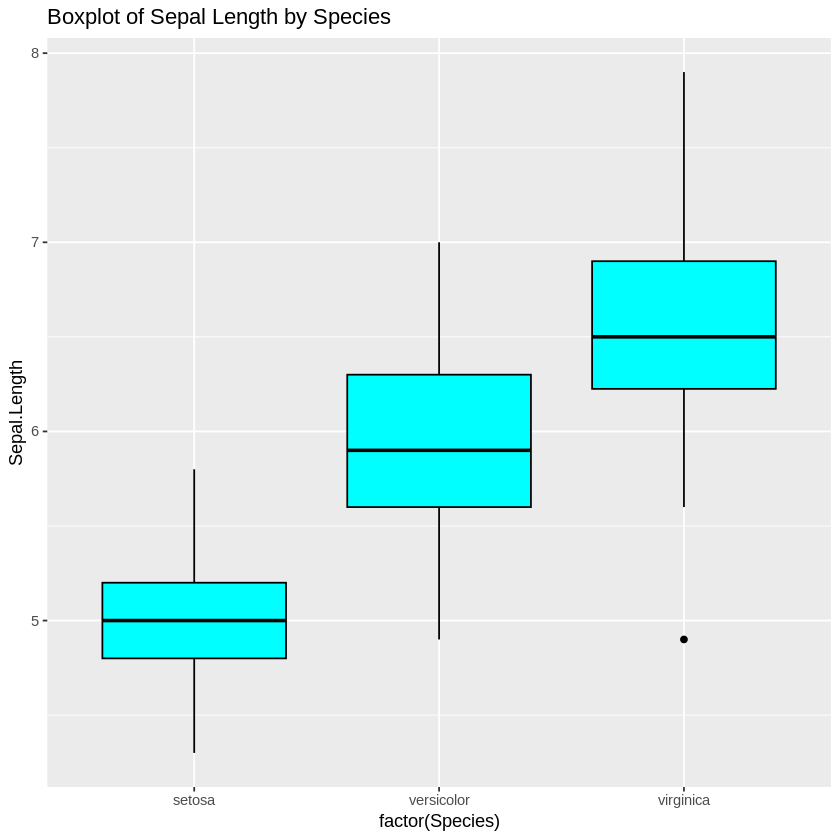

In [24]:
library(ggplot2)

ggplot(iris, aes(x = factor(Species), y = Sepal.Length)) +
  geom_boxplot(fill = "cyan", color = "black") +
  ggtitle("Boxplot of Sepal Length by Species")


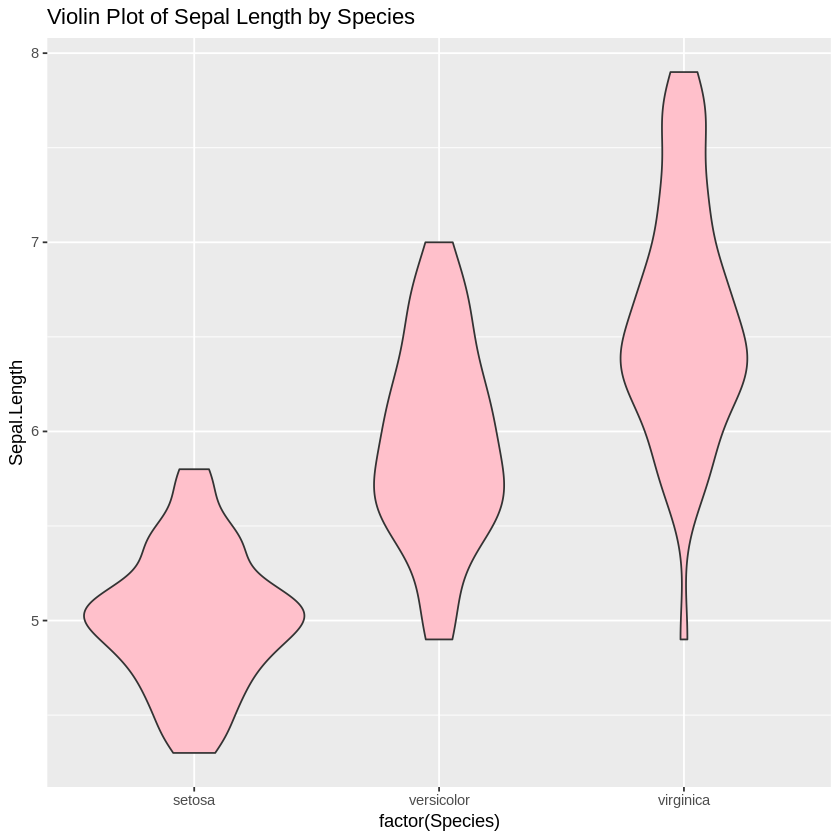

In [25]:
ggplot(iris, aes(x = factor(Species), y = Sepal.Length)) +
  geom_violin(fill = "pink") +
  ggtitle("Violin Plot of Sepal Length by Species")

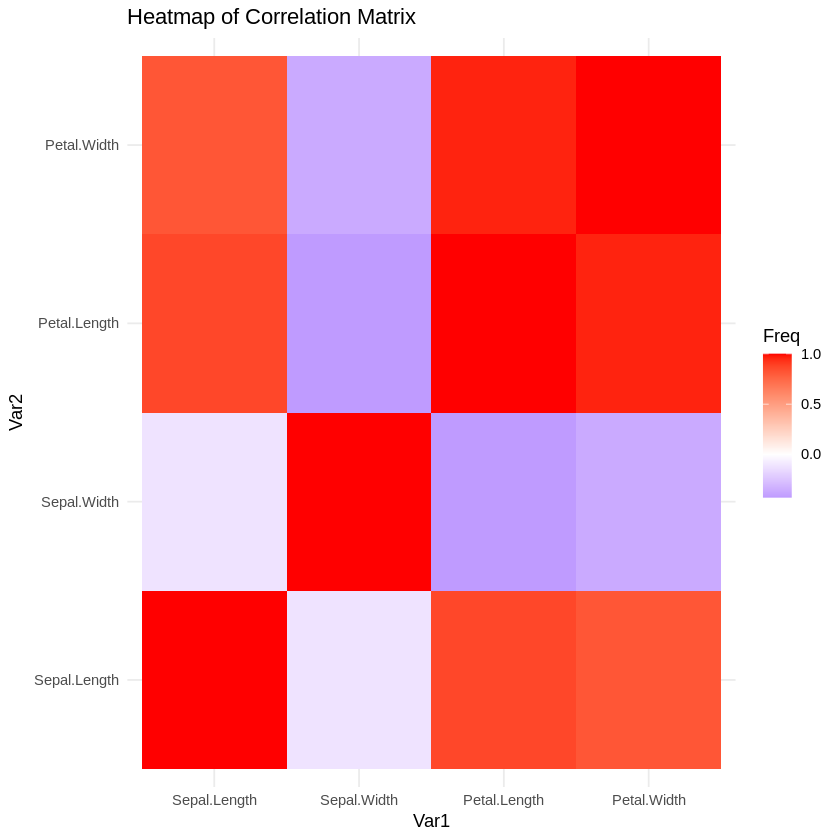

In [28]:
library(ggplot2)
library(tidyr)

cor_matrix <- cor(iris[, sapply(iris, is.numeric)])

melted_cor <- as.data.frame(as.table(cor_matrix))

ggplot(melted_cor, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  ggtitle("Heatmap of Correlation Matrix") +
  theme_minimal()


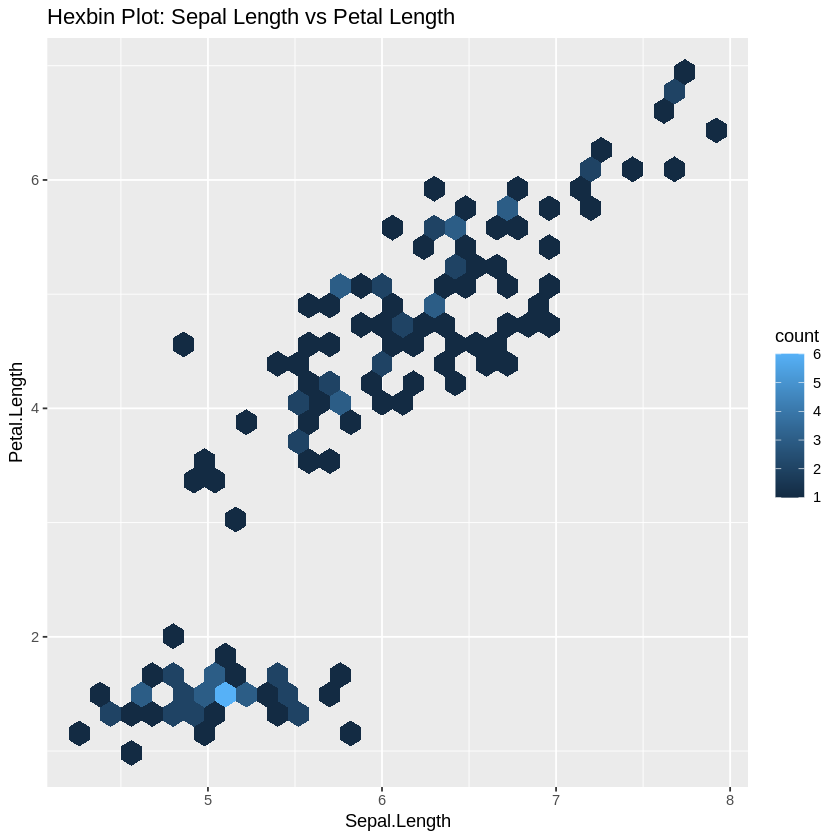

In [30]:
library(hexbin)

ggplot(iris, aes(x = Sepal.Length, y = Petal.Length)) +
  geom_hex() +
  ggtitle("Hexbin Plot: Sepal Length vs Petal Length")


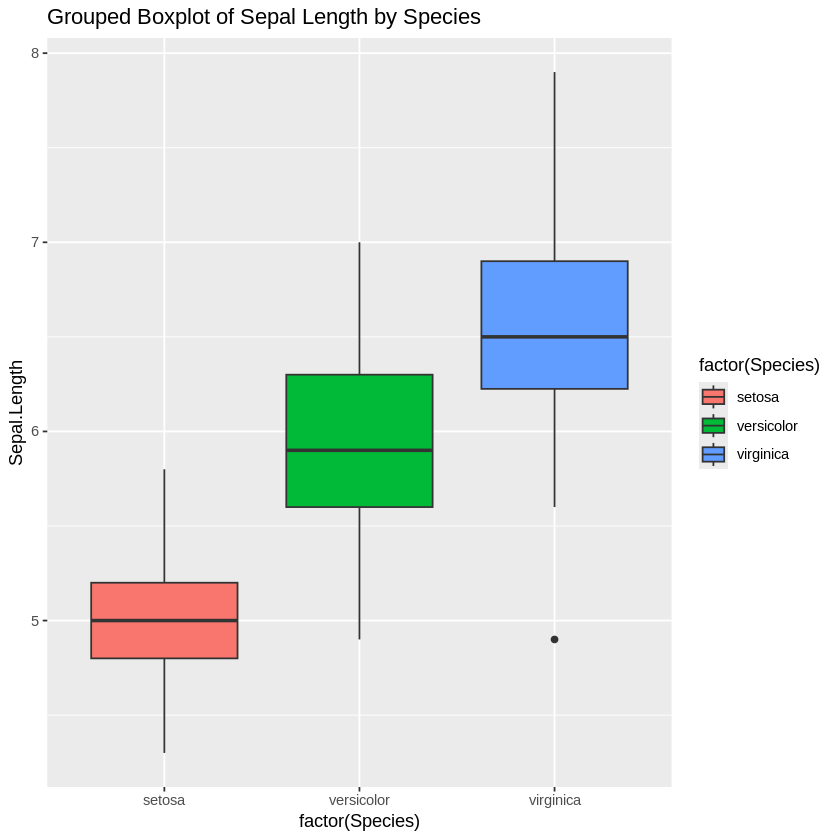

In [31]:
library(ggplot2)

ggplot(iris, aes(x = factor(Species), y = Sepal.Length, fill = factor(Species))) +
  geom_boxplot() +
  ggtitle("Grouped Boxplot of Sepal Length by Species")


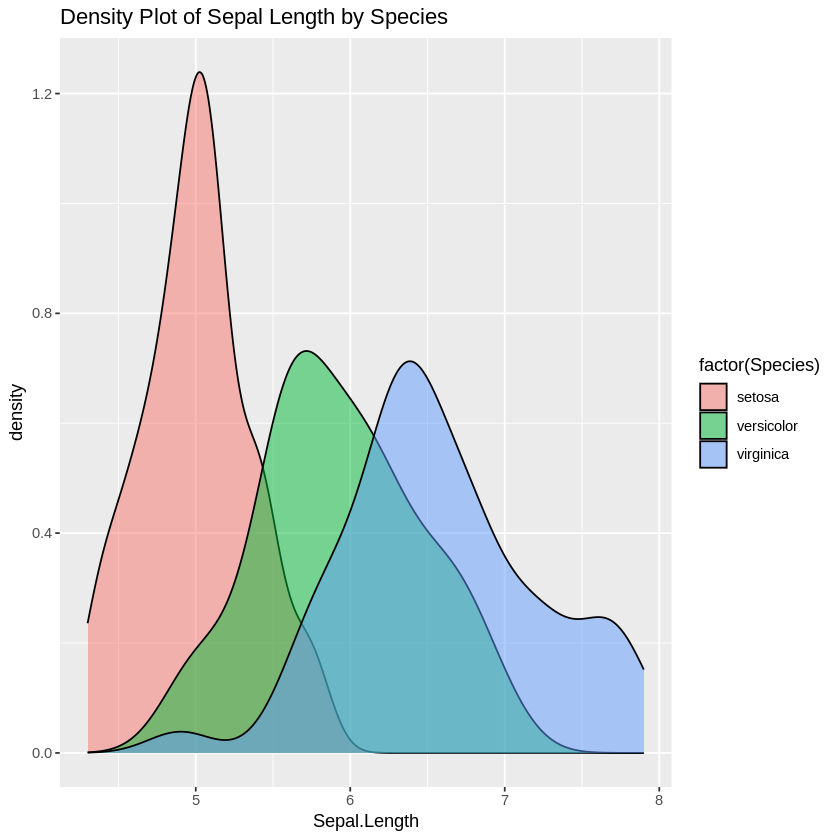

In [32]:
library(ggplot2)

ggplot(iris, aes(x = Sepal.Length, fill = factor(Species))) +
  geom_density(alpha = 0.5) +
  ggtitle("Density Plot of Sepal Length by Species")


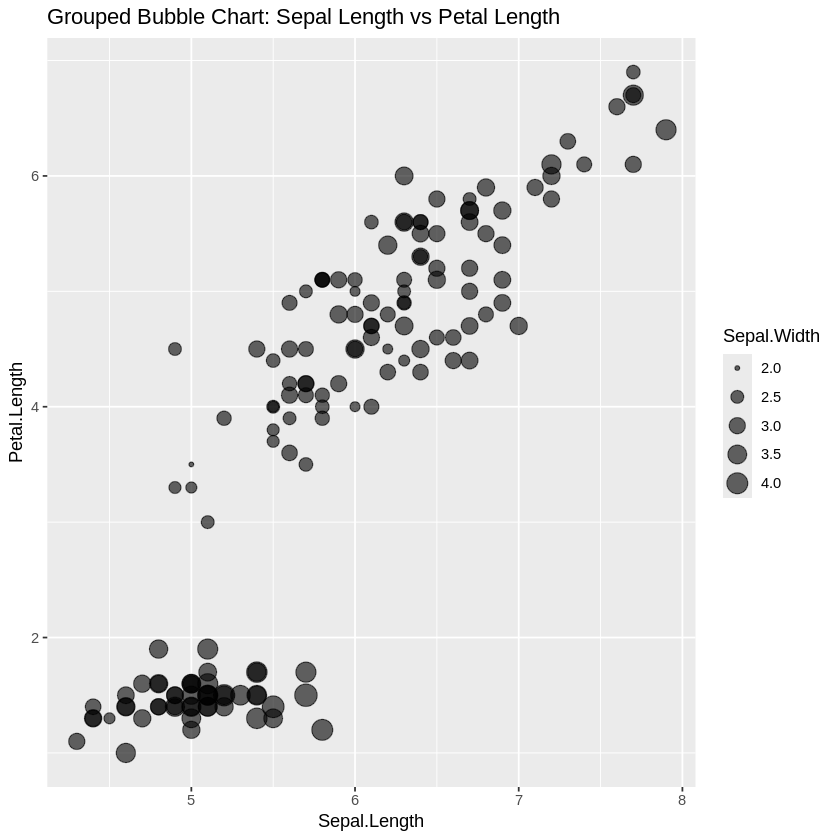

In [33]:
library(ggplot2)

ggplot(iris, aes(x = Sepal.Length, y = Petal.Length, size = Sepal.Width)) +
  geom_point(alpha = 0.6) +
  ggtitle("Grouped Bubble Chart: Sepal Length vs Petal Length")
